In [8]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import matplotlib as mpl
from matplotlib import colormaps
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import csv
from matplotlib.colors import LogNorm, Normalize

In [30]:
df = pd.read_csv("/home/anna/Documents/new_good_tables/sRNAs_heatmap.tsv",decimal=',', sep='\t', header=0)
df = df.sort_values(by=['Y1_moj_RPM','Y2_moj_RPM','Y2_ari_RPM'], ascending=True, inplace=False)
df

,Group,Superfamily,Classification,Y1_moj_RPM,Y2_moj_RPM,Y2_ari_RPM
5,LTR/,Lokiretrovirus,LTR/Lokiretrovirus,0.000000,0.000000,0.017902
21,LINE/,Nimb,LINE/Nimb,0.000000,0.000000,0.083779
28,LINE/,Tx1,LINE/Tx1,0.024177,0.000000,0.071606
15,LINE/,Ingi,LINE/Ingi,0.048354,0.031930,0.000000
12,LINE/,Crack,LINE/Crack,0.048354,0.042147,0.358030
26,LINE/,Rex1,LINE/Rex1,0.048354,0.106007,0.000000
19,LINE/,L2,LINE/L2,0.080267,0.042147,0.000000
4,LTR/,Caulimoviridae,LTR/Caulimoviridae,0.096707,0.255439,0.000000
25,LINE/,RTEX,LINE/RTEX,0.257241,0.371664,0.107409
6,PLE/,Athena,PLE/Athena,0.258209,0.233727,0.000000


<function matplotlib.pyplot.show(close=None, block=None)>

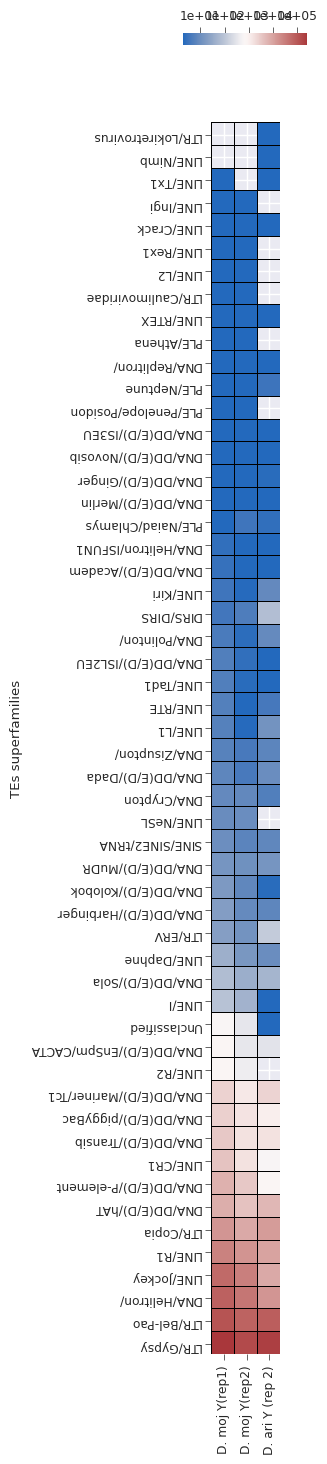

In [33]:
fig = plt.figure(figsize=(16, 20))
ax = plt.subplot()

my_cmap = sns.color_palette("vlag", as_cmap=True)

x = df.Classification.to_list()

sns.set(font_scale=0.8)
names = ['D. moj Y(rep1)','D. moj Y(rep2)','D. ari Y (rep 2)']

data = df[['Y1_moj_RPM','Y2_moj_RPM','Y2_ari_RPM']]
ax = sns.heatmap(data, cmap=my_cmap, xticklabels=False,cbar_kws={"shrink": 0.1,'aspect': 10, 'location':'top','ticks':[10,100,1000,10000,100000], 'format':'%.e'}, yticklabels=False, norm=LogNorm(2), square=True, linewidths=0.5,linecolor="black")

ax.set_ylabel('TEs superfamilies', rotation=90)

yticks = []
for i in np.arange(len(x)):
    a = float(i)+0.55
    yticks.append(a)

ax.set_yticks(yticks)

ax.set_yticklabels(x, rotation=180)
ax.yaxis.tick_left()

xticks = [0.55,1.55,2.55]
ax.set_xticks(xticks)
ax.tick_params(bottom=True, right=False, width=0.5, length=4)
ax.set_xticklabels(names,rotation=90)


cbar = ax.collections[0].colorbar
cbar.ax.yaxis.get_ticklocs(minor=False) 
cbar.ax.tick_params(width=0.5, length=4)

plt.savefig('/home/anna/Documents/heatmap.png', dpi=1200)

plt.show